# Bienvenido a tu primer notebook de ciencia de datos!!!

En este notebook desarrollaremos el problema del Titanic. Este dataset es el más popular entre todos los que quieren iniciar en este mundo de la Ciencia de Datos. Básicamente se busca predecir si un pasajero, con ciertas caractéristicas, sobrevivió o no a esta tragedia ocurrida en el siglo 20. 

Recuerda que para comenzar a hacer el análisis,  tenemos que involucrarnos con el problema en sí y conocer nuestra data. Así que comencemos! 

In [1]:
import pandas as pd  #Sirve para manejar y manipular la data en forma de dataframe
import numpy as np #Calculos vectoriales que pueden ser aplicados al dataframe
import matplotlib.pyplot as plt #Para darle estructura y desplegar el gráfico 
import seaborn as sns #Para hacer el gráfico todo bonito y chulo 
import random #Una librería para randomizar 

#En este notebook usaremos:

import missingno as ms #Librería muy útil para ver los valores nulos

from sklearn.preprocessing import normalize #Porque normalizaremos alguna de nuestra variables
from sklearn.linear_model import LogisticRegression #Uno de los modelos que usaremos (los demas los importaremos mas adelante)
from sklearn.model_selection import train_test_split #Para dividir nuestra en train y test
from sklearn.model_selection import GridSearchCV #Usaremos GridSearch para optimizar nuestros parámetros de nuestros Modelos.

#Usualmente salen advertencias de actualizaciones pasadas de las librerías, las ignoramos por ahora...
import warnings
warnings.filterwarnings('ignore')

En este caso, tenemos dos tablas de datos: train y summit (test.csv). Ahora, esta data ha sido sacada de una **competencia de Kaggle** Por eso, la data que nombraremos como **summit contendrá la base para poder aplicar nuestro modelo ya completado**. El mismo Kaggle se encargará de saber si es un buen modelo o no. Posteriormente, esta tabla nombrada **train nos servirá tanto para entrenar como para testear nuestro modelos**. Así que no te sorprendas si es que más adelante dividimos este train en dos dataframes diferentes...

In [2]:
train = pd.read_csv('train.csv')

summit = pd.read_csv('test.csv')

In [3]:
summit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Explicaremos las variables que están dentro de la data**

**Pclass**: Status socioeconómico 1st = ClaseAlta 2nd=ClaseMedia 3rd=ClaseBaja 

**SibSp**: El dataset define relaciones familiares, es decir, nos dice el número de hermanos / espos@s dentro del Titanic.

**Parch**: Número de padres / hijos dentro del Titanic

**Spouse** = marido / Mujer (se obvia novias o enamoradas)

**parch**: También se defines relaciones familiares en general de esta forma. Por ejemplo, algunos niños viajan solamente con su nana, por eso en esta variable tendrían 0.

**Survived**: Si la persona sobrevivió o no.	0 = No, 1 = Sí

**Ticket***: La clase de ticket que sacó el pasajero.

**Embarked**: Puerta de embarcación,	C = Cherbourg, Q = Queenstown, S = Southampton

**Cabin**: El número de cabina

In [6]:
print('Para la data en train, tendremos:')
print('--------------------------------------------------------------------------------------------')
for n in train.columns:
    print('El número de valores diferentes en la columna', n, 'es:', len(train[n].unique()))
print('--------------------------------------------------------------------------------------------')
#Ahora buscaremos el número de valores nulos dentro de la data
for n in train.columns:
    if train[n].isnull().values.any() == True:
        print('Existen' , train[n].isna().sum(), 'valores nulos en la columna', n)

Para la data en train, tendremos:
--------------------------------------------------------------------------------------------
El número de valores diferentes en la columna PassengerId es: 891
El número de valores diferentes en la columna Survived es: 2
El número de valores diferentes en la columna Pclass es: 3
El número de valores diferentes en la columna Name es: 891
El número de valores diferentes en la columna Sex es: 2
El número de valores diferentes en la columna Age es: 89
El número de valores diferentes en la columna SibSp es: 7
El número de valores diferentes en la columna Parch es: 7
El número de valores diferentes en la columna Ticket es: 681
El número de valores diferentes en la columna Fare es: 248
El número de valores diferentes en la columna Cabin es: 148
El número de valores diferentes en la columna Embarked es: 4
--------------------------------------------------------------------------------------------
Existen 177 valores nulos en la columna Age
Existen 687 valores n

In [7]:
print('Para la data que summitearemos, tendremos:')
print('-------------------------------------------------------------------------------')
for n in summit.columns:
    print('El número de valores diferentes en la columna', n, 'es:', len(summit[n].unique()))
print('-------------------------------------------------------------------------------')
#Ahora buscaremos el número de valores nulos dentro de la data
for n in summit.columns:
    if summit[n].isnull().values.any() == True:
        print('Existen' , summit[n].isna().sum(), 'valores nulos en la columna', n)

Para la data que summitearemos, tendremos:
-------------------------------------------------------------------------------
El número de valores diferentes en la columna PassengerId es: 418
El número de valores diferentes en la columna Pclass es: 3
El número de valores diferentes en la columna Name es: 418
El número de valores diferentes en la columna Sex es: 2
El número de valores diferentes en la columna Age es: 80
El número de valores diferentes en la columna SibSp es: 7
El número de valores diferentes en la columna Parch es: 8
El número de valores diferentes en la columna Ticket es: 363
El número de valores diferentes en la columna Fare es: 170
El número de valores diferentes en la columna Cabin es: 77
El número de valores diferentes en la columna Embarked es: 3
-------------------------------------------------------------------------------
Existen 86 valores nulos en la columna Age
Existen 1 valores nulos en la columna Fare
Existen 327 valores nulos en la columna Cabin


## Missingno: Una forma más interactiva de ver mis nulos.

Esta librería nos grafica nuestro dataframe de tal manera en la que vemos qué columnas tienen datos vacíos. Esto es representado por los espacios en blanco que tenemos. Es más intuitivo y fácil de mapear cuáles son los problemas de los nulos dentro de nuestro dataset. 

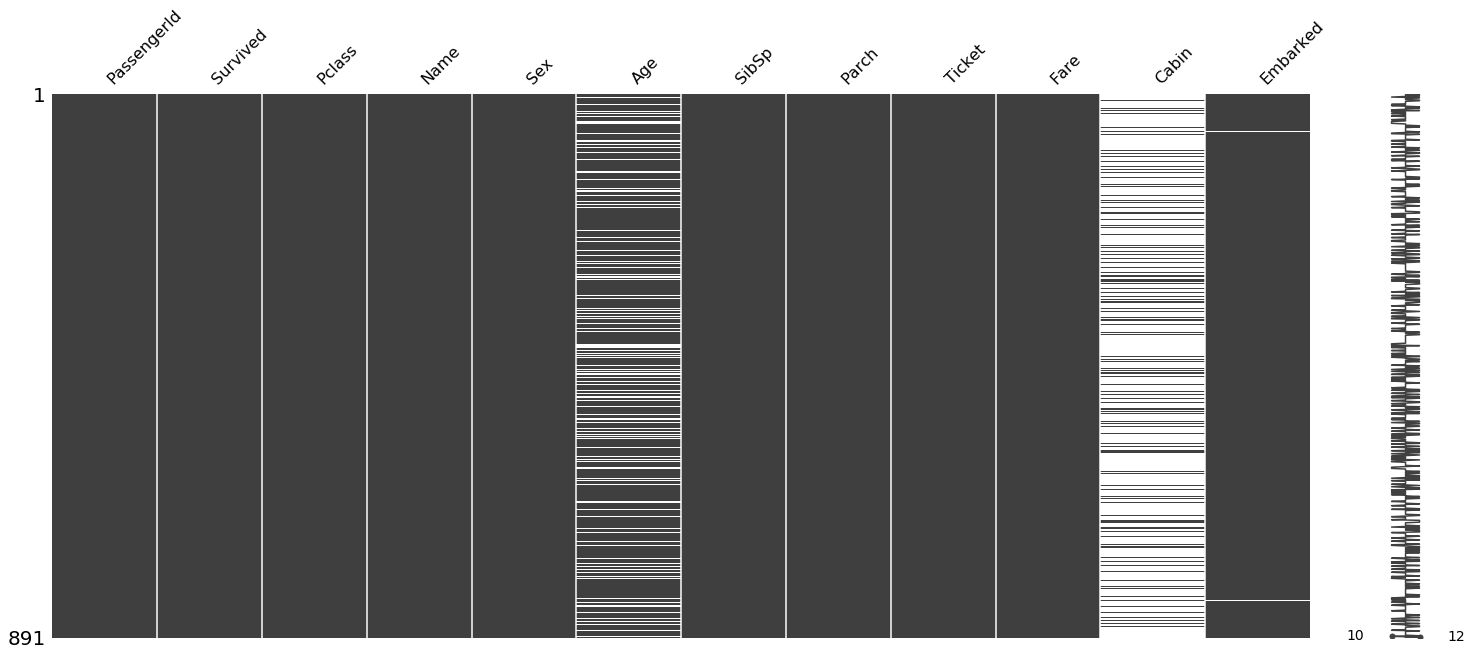

In [8]:
ms.matrix(train)

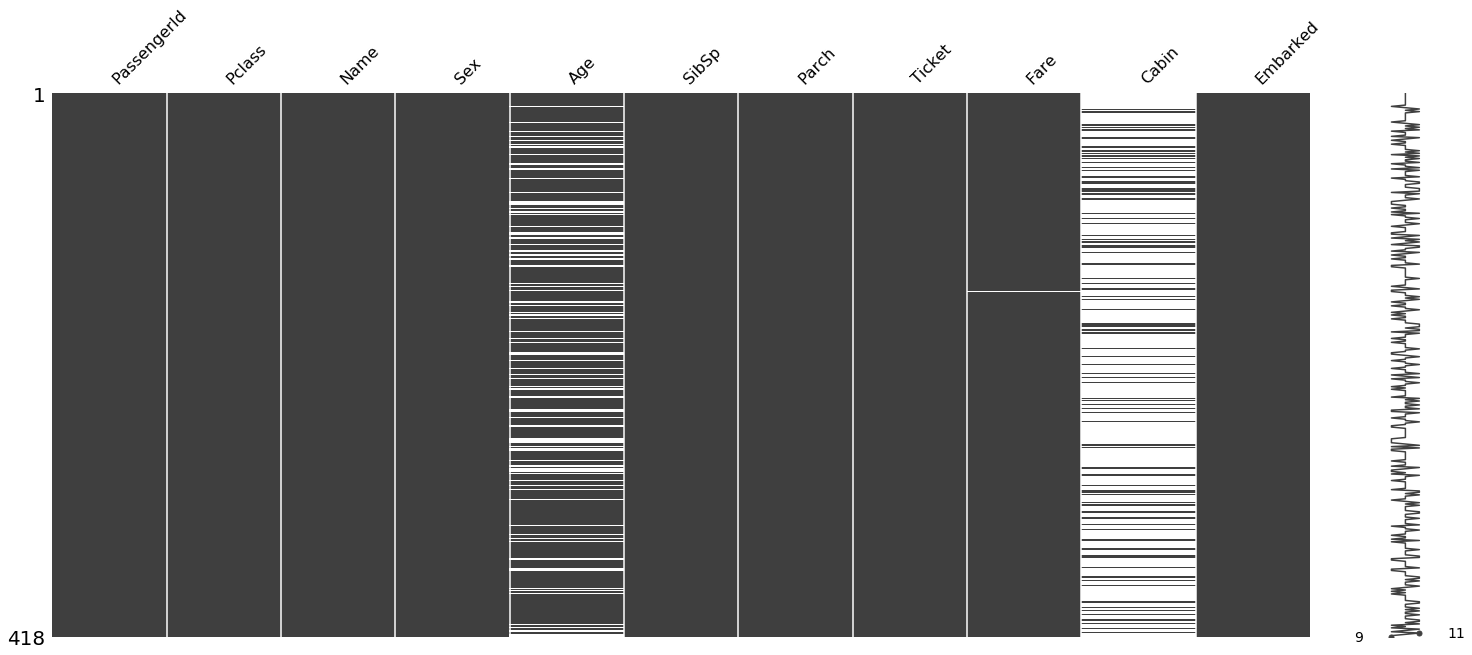

In [9]:
ms.matrix(summit)

**Eliminaremos** los valores que nos parecen **irrelevantes** para predecir si una persona sobrevive o no dentro del Titanic. En este caso, intuimos que son:

- Nombre: ¿Qué tiene que ver el nombre con que se sobreviva o no?


- Ticket: Si bien se podría pensar que el ticket nos daría algún criterio, en este caso no se ha encontrado una relación directa. Ah pero eso no quita que la podamos usar. Puedes ponerte creativo y sacar una conclusión!


- PassengerId: Lo mismo que la variable Ticket. Asumimos que no tiene relación con la supervivencia y lo quitamos.

In [10]:
train = train.drop(['Name','Ticket','PassengerId'], axis = 1)
summit = summit.drop(['Name','Ticket','PassengerId'], axis = 1)

## Reemplazando Nulos: 

Un valor Nulo no es más que data que no ha sido recogida (o imputada), osea **data vacía**. Esta nulidad puede deberse a diferentes casos y las maneras en las que podemos lidiar con ellos son varias. La forma en cómo podemos tratar con este tipo de variable depende de diferentes factores como la cantidad, la dispersión y la importancia de la variable para el target (recuerda que target es la variable que vamos a predecir). 



Ahora llenaremos los valores NaN de las columnas Age y Embarked. En la columna Age llenaremos de manera random definiendo un intervalo en el que nuestra data va iterar. Ese intervalo será definido por **(media +- DesviaciónEstandar)**

In [12]:
print("La edad media de nuestro train dataset es:",train['Age'].mean(),"\nLa desviación estandar de la edad de nuestro train dataset es:",train['Age'].std())
print("La edad media de nuestro summitdataset es:",summit['Age'].mean(),"\nLa desviación estándar de la edad de nuestro summites:",summit['Age'].std())

La edad media de nuestro train dataset es: 29.69911764705882 
La desviación estandar de la edad de nuestro train dataset es: 14.526497332334044
La edad media de nuestro summitdataset es: 30.272590361445783 
La desviación estándar de la edad de nuestro summites: 14.18120923562442


##### Crearemos una función para llenarlo automáticamente:

Recuerda que una función es...

.


.

.


In [13]:
#Crearemos una función para llenar de manera random dentro del intervalo de la media y desv stand (std)
def llena_nan_con_media_y_std(df,col='Age'):
    nan = df[df[col].isna()] #el dataset de los que tienen la columna (col = 'Age' ) con valores nulos
    min_ = df[col].mean() - df[col].std() #El comienzo de nuestro intervalo, la media menos la desv. estandar.
    max_ = df[col].mean() + df[col].std() #El final de nuestro intervalo, la media más la desv. estandar.
    for i in nan.index: #Para cada i en los index de mi data nula
        random_num = random.uniform(min_,max_) #randomizo dentro de los intervalos que quiero
        df[col].loc[i] = random_num #Reemplazo los valores dentro de mi data original.

In [14]:
llena_nan_con_media_y_std(train) #Aplico la función para train
llena_nan_con_media_y_std(summit) #Aplico la función para summit

In [16]:
#Vamos a tranformar los valores a integer (enteros)

#Hacemos esto porque al randomizar hemos obtenido valores decimales. ¿Es lógico tener 3.5 años? Por eso reemplazamos y 
#se transforman los datos.
train['Age'] = train['Age'].astype(int)
summit['Age'] = summit['Age'].astype(int)

Ahora, podemos visualizar las diferencias entre la data antes y después de reemplazar (recuerda que hemos hecho una copia del dataframe para poder trabajar en ello)

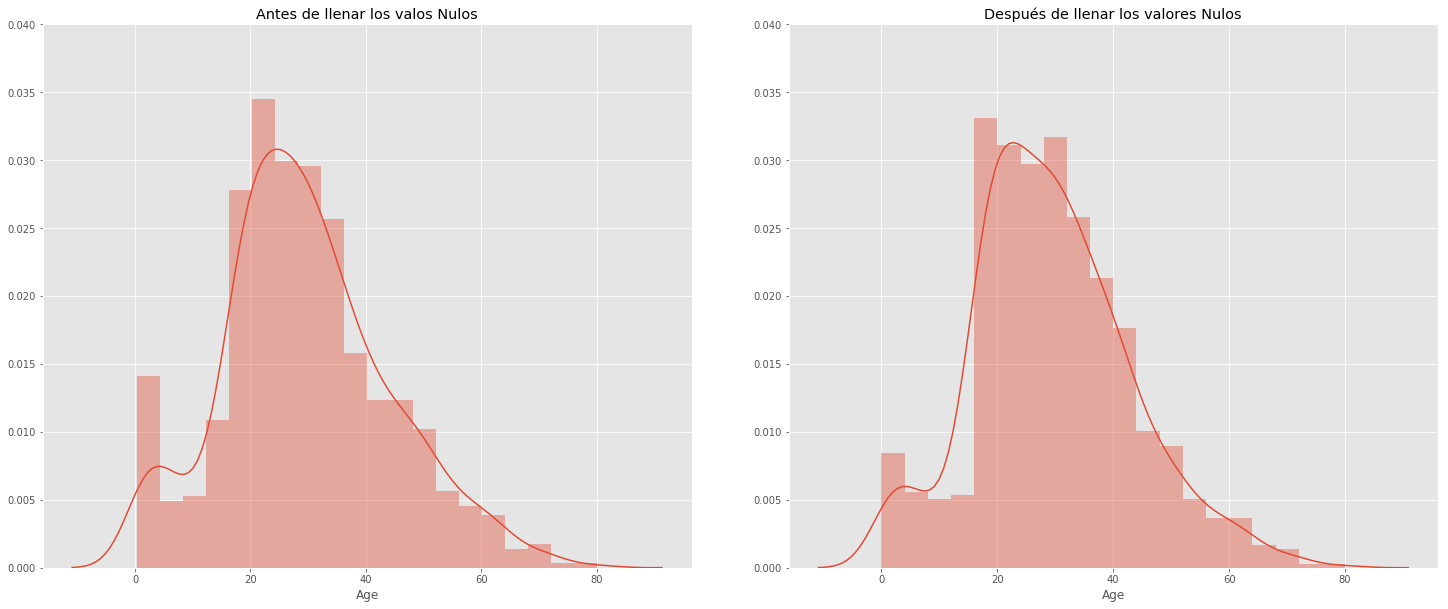

In [17]:
plt.style.use('ggplot') #Es el estilo que le ponemos a la data
fig = plt.figure(figsize = (25,10)) #Podemos elegir de qué tamaño poner nuestra data
fig.subplots_adjust(hspace=0.6, wspace=0.15) #Para que se pongan juntos los gráficos
ax = fig.add_subplot(1,2,1) #La posición de mi primer gráfico
ax.set_ylim([0,0.04]) #Los límites del eje y
ax.set_title('Antes de llenar los valos Nulos') #El título 
sns.distplot(train_bf['Age'].dropna(), bins=20) #El gráfico de distribución
ax_2 = fig.add_subplot(1,2,2) #agrego el otro gráfico
ax_2.set_ylim([0,0.04])
ax_2.set_title('Después de llenar los valores Nulos')
sns.distplot(train['Age'],bins=20)

Podemos decir a simple vista que no hay diferencia significativa entre la data que hemos llenado y que no. La distribución es casi la misma, pero lo curioso es que tiene dos picos. Luego lidiaremos con eso. 

Ahora tenemos que hacernos cargo de los valores nulos de la columna Embarked y Fare dentro de los dos dataframes (summit y train)


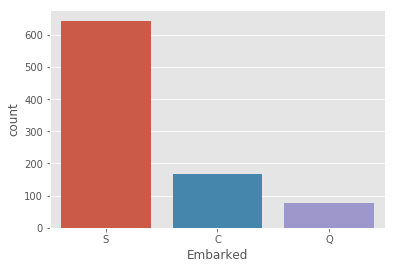

In [18]:
#Visualizaremos los datos de la columna Embarked en nuestra data de entrenamiento:
sns.countplot(x='Embarked',data=train)

A pesar de que podamos llenarlo con la moda directamente con fillna, prefiero ver con mis propios ojos qué tanto difiere la moda de su segundo valor más recurrente....

In [19]:
#Ahora veremos que la mayoría de data en la variable Embarked es S, podemos llenarlo con esta moda. 
nan_emb = train[train['Embarked'].isna()]
for i in nan_emb.index:
    train['Embarked'].loc[i] = 'S'

In [20]:
#We deal with that one nan value in fare column of summitdata
nan_fare = summit[summit['Fare'].isna()]
for i in nan_fare.index:
    summit['Fare'].loc[i] = summit['Fare'].mean()

## Detectando y eliminando outliers

In [21]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22,1,0,7.2500,NaN,S
1,1,1,female,38,1,0,71.2833,C85,C
2,1,3,female,26,0,0,7.9250,NaN,S
3,1,1,female,35,1,0,53.1000,C123,S
4,0,3,male,35,0,0,8.0500,NaN,S


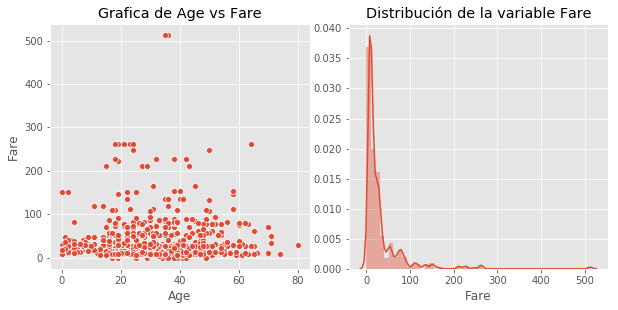

In [22]:
plt.style.use('ggplot') #Es el estilo que le ponemos a la data
fig = plt.figure(figsize = (10,4.5)) #Podemos elegir de qué tamaño poner nuestra data
fig.subplots_adjust(hspace=0.6, wspace=0.15) #Para que se pongan juntos los gráficos
ax = fig.add_subplot(1,2,1) #La posición de mi primer gráfico
ax.set_title('Grafica de Age vs Fare') #El título 
sns.scatterplot(x='Age',y='Fare',data=train) #El gráfico de distribución
ax_2 = fig.add_subplot(1,2,2) #agrego el otro gráfico
ax_2.set_title('Distribución de la variable Fare')
sns.distplot(train['Fare'])

Elimnamos el outlier de esta manera:

In [23]:
index_to_drop = train[train.Fare > 300].index #El index de la data donde el train es mayor que 300
train.drop(index_to_drop, inplace=True, axis=0)

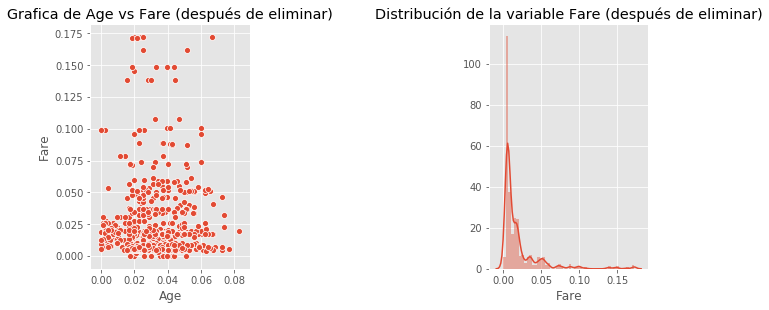

In [45]:
plt.style.use('ggplot') #Es el estilo que le ponemos a la data
fig = plt.figure(figsize = (10,4.5)) #Podemos elegir de qué tamaño poner nuestra data
fig.subplots_adjust(hspace=0.6, wspace=1.5) #Para que se pongan juntos los gráficos
ax = fig.add_subplot(1,2,1) #La posición de mi primer gráfico
ax.set_title('Grafica de Age vs Fare (después de eliminar)') #El título 
sns.scatterplot(x='Age',y='Fare',data=train) #El gráfico de distribución
ax_2 = fig.add_subplot(1,2,2) #agrego el otro gráfico
ax_2.set_title('Distribución de la variable Fare (después de eliminar)')
sns.distplot(train['Fare'])

La pregunta queda en... Deberíamos estandarizar nuestros datos?

## Podemos (y debemos) crear otros features a la data:

Hemos visto que hay dos variables que se relacionan a la familia del pasajero (SibSP & Parch), asi que por qué no creamos una variable que resuma la cantidad de familiares de una persona? Y también contar si la persona viaja sola o acompañada en la nave.

In [25]:
#Creamos la variable miembros de familia. 

train['Family_members'] = train['SibSp'] + train['Parch'] + 1 #him/her
summit['Family_members'] = summit['SibSp'] + summit['Parch'] + 1

#Crearemos la variable Alone para nuestra data
train['not_Alone'] = 0 
train['not_Alone'].loc[train['Family_members'] > 1] = 1

summit['not_Alone'] = 0 
summit['not_Alone'].loc[summit['Family_members'] > 1] = 1

In [26]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_members,not_Alone
0,0,3,male,22,1,0,7.2500,NaN,S,2,1
1,1,1,female,38,1,0,71.2833,C85,C,2,1
2,1,3,female,26,0,0,7.9250,NaN,S,1,0
3,1,1,female,35,1,0,53.1000,C123,S,2,1
4,0,3,male,35,0,0,8.0500,NaN,S,1,0


#### Dándole sentido a nuestra variable... 

**Pensando el problema**: ¿Qué es lo que pasa en un desastre natural? No le dan prioridad a las mujeres y niños para que puedan ir directo a las naves de rescate? Entonces, sería conveniente identificar si el pasajero es Hombre, Mujer o **niño** Para esto, crearemos la variable child (niño en ingles, jeje) 

In [27]:
def agg_child(df,col='Age'):
    mask = (df[col] <= 15)
    df.loc[mask,'Sex'] = 'child'

#We apply the function
agg_child(train)
agg_child(summit)

Ahora, vamos a trabajar la variable Cabin. En realidad, a nosotros nos importa solamente si fue a Cabina o no. Por eso, binarizaremos la variable Cabin...

In [28]:
def agg_cabin_bin(df,col='Cabin'):
    df['with_Cabin'] = 0
    mask = (df[col].isna() == False)
    df.loc[mask,'with_Cabin'] = 1
#0 if the passenger had not a Cabin, 1 if he has a cabin

In [29]:
agg_cabin_bin(train)
agg_cabin_bin(summit)

del train['Cabin']
del summit['Cabin']

In [30]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_members,not_Alone,with_Cabin
0,0,3,male,22,1,0,7.2500,S,2,1,0
1,1,1,female,38,1,0,71.2833,C,2,1,1
2,1,3,female,26,0,0,7.9250,S,1,0,0
3,1,1,female,35,1,0,53.1000,S,2,1,1
4,0,3,male,35,0,0,8.0500,S,1,0,0


## Data Visualization:

**Por qué es importante visualizar nuestros datos?**:

Text(0.5, 1.0, 'Sex vs Survived')

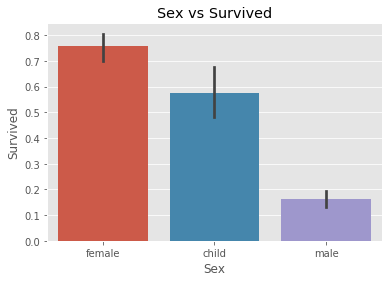

In [31]:
sns.barplot(x='Sex',y='Survived',data=train, order=['female','child','male'])
plt.title('Sex vs Survived')

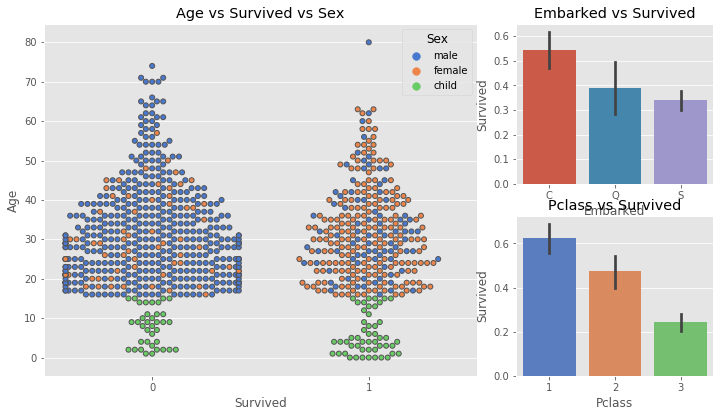

In [32]:
gs = plt.GridSpec(2,3,wspace=0.45, hspace=0.8) #Creo un espacio para poner mis gráficos
plt.figure(figsize=(12,10)) #tamaño del grafico total 
ax1 = plt.subplot2grid((3,3),(0,0),rowspan=2,colspan=2) #Creo espacio para mi subplot más grande: Para ver age vs survived vs sex
plt.title('Age vs Survived vs Sex')
sns.swarmplot(x = 'Survived',y='Age', 
              data=train, linewidth=1,hue='Sex', palette = 'muted')
ax2 = plt.subplot2grid((3,3),(0,2)) #Creo espacio para mi segundo subplot, embarked vs survides
plt.title('Embarked vs Survived')
sns.barplot(x='Embarked',y='Survived',
            data=train,order=['C','Q','S'])
ax3 = plt.subplot2grid((3,3),(1,2)) #Creo espacio para mi tercer subplot...
plt.title('Pclass vs Survived')
sns.barplot(x='Pclass',y='Survived',
            data=train, palette = 'muted')

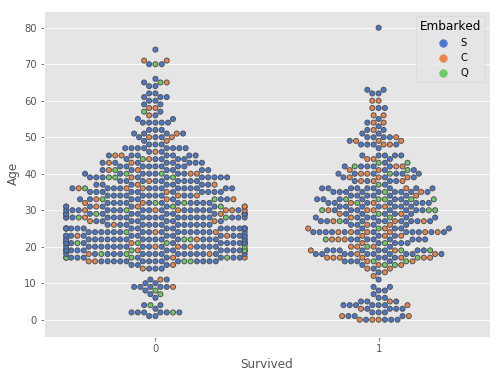

In [33]:
plt.figure(figsize=(8,6))
sns.swarmplot(x = 'Survived',y='Age', 
              data=train, linewidth=1,hue='Embarked', palette = 'muted')
# No vemos acaso que los verdes están más dispersos a sobrevivir?

In [34]:
#Now we can say that Embarked class/Pclass/sex have priorities for survive. So we can transform the categorical data to numbers
cat_to_nums = {"Embarked":  {"S": 0, "Q": 1, "C":2},
               "Sex": {"male":0,"child":1,"female":2}}
#We will use replace to convert the values
train.replace(cat_to_nums, inplace = True)

In [35]:
summit.replace(cat_to_nums, inplace = True)

In [36]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_members,not_Alone,with_Cabin
0,0,3,0,22,1,0,7.2500,0,2,1,0
1,1,1,2,38,1,0,71.2833,2,2,1,1
2,1,3,2,26,0,0,7.9250,0,1,0,0
3,1,1,2,35,1,0,53.1000,0,2,1,1
4,0,3,0,35,0,0,8.0500,0,1,0,0


## Encontrando correlaciones en la data:

Si una variable está **muy correlacionada** con otra, entonces deberíamos eliminarla para que no caiga en el problema de la **multicolinealidad**. La multicolinealidad es definida cuando las variables predictoras se obstaculizan unas y otras. Por ejemplo, si tengo dos variables que son al final lo mismo... ¿para qué tener dos cuando debería tener una? Le estaría dando como doble peso a la misma variable y eso sesga al modelo...

In [37]:
train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_members,not_Alone,with_Cabin
Survived,1.000000,-0.334068,0.560871,-0.061184,-0.033395,0.082157,0.261742,0.160824,0.018211,0.204808,0.314549
Pclass,-0.334068,1.000000,-0.142404,-0.334631,0.080937,0.018212,-0.604960,-0.153435,0.064413,-0.136683,-0.725906
Sex,0.560871,-0.142404,1.000000,-0.072335,0.152861,0.265073,0.237647,0.095907,0.236868,0.327546,0.158746
Age,-0.061184,-0.334631,-0.072335,1.000000,-0.222105,-0.160204,0.093512,0.022328,-0.231815,-0.153696,0.232935
SibSp,-0.033395,0.080937,0.152861,-0.222105,1.000000,0.415141,0.211816,-0.065560,0.890800,0.585416,-0.038959
Parch,0.082157,0.018212,0.265073,-0.160204,0.415141,1.000000,0.263910,-0.039682,0.783198,0.582740,0.036257
Fare,0.261742,-0.604960,0.237647,0.093512,0.211816,0.263910,1.000000,0.196229,0.276580,0.334307,0.543796
Embarked,0.160824,-0.153435,0.095907,0.022328,-0.065560,-0.039682,0.196229,1.000000,-0.064627,0.064908,0.154961
Family_members,0.018211,0.064413,0.236868,-0.231815,0.890800,0.783198,0.276580,-0.064627,1.000000,0.691163,-0.008517
not_Alone,0.204808,-0.136683,0.327546,-0.153696,0.585416,0.582740,0.334307,0.064908,0.691163,1.000000,0.157543


In [38]:
def correlation_heatmap(df): #from "A Data Science Framework: To Achieve 99% Accuracy" kernel by LD Freedman
    s , ax = plt.subplots(figsize =(14, 12)) #Dos subplots
    colormap = sns.diverging_palette(220, 10, as_cmap = True) #El mapa de colores
    g = sns.heatmap(df.corr(), cmap = colormap,square=True,  #Hago el mapa de calores de la matriz
        cbar_kws={'shrink':.9 }, 
        ax=ax, annot=True,linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 })
    
    plt.title('Correlaciones Pearson de los Features', y=1.05, size=15)

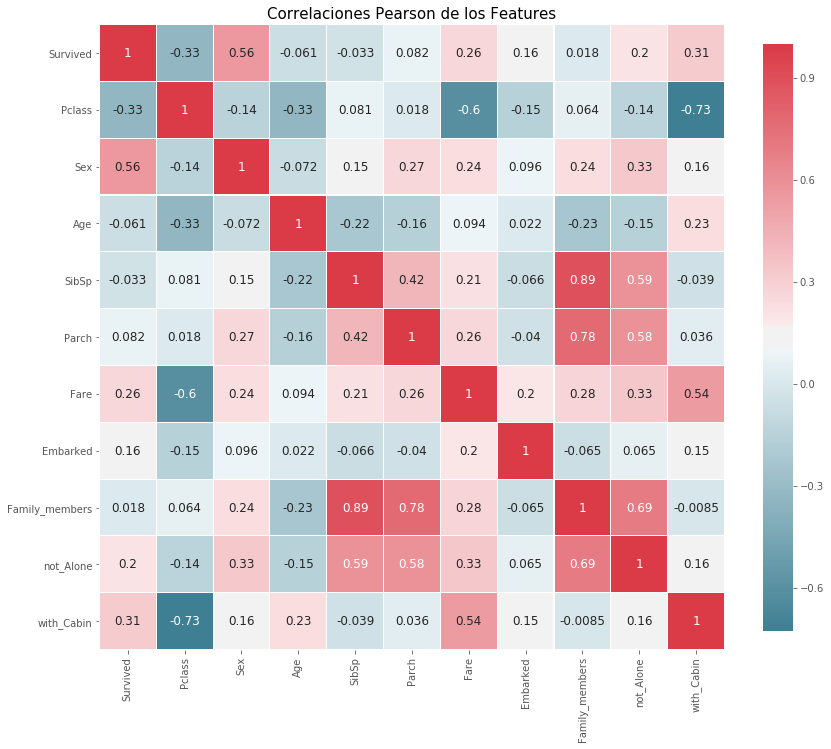

In [39]:
correlation_heatmap(train)

## Normalizando mi data:
Cuándo normalizar o standarizar?: https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc

Veamos la distribución de nuestros dos datos netamente numéricos que tenemos:


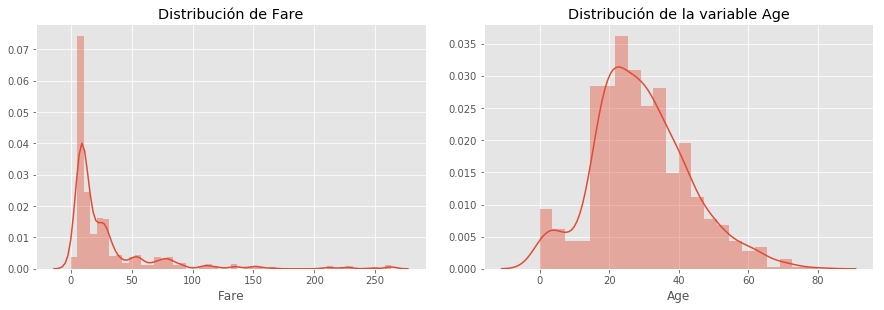

In [40]:
plt.style.use('ggplot') #Es el estilo que le ponemos a la data
fig = plt.figure(figsize = (15,4.5)) #Podemos elegir de qué tamaño poner nuestra data
fig.subplots_adjust(hspace=0.6, wspace=0.15) #Para que se pongan juntos los gráficos
ax = fig.add_subplot(1,2,1) #La posición de mi primer gráfico
ax.set_title('Distribución de Fare') #El título 
sns.distplot(train['Fare']) #El gráfico de distribución
ax_2 = fig.add_subplot(1,2,2) #agrego el otro gráfico
ax_2.set_title('Distribución de la variable Age')
sns.distplot(train['Age'])

In [41]:
# Normalizando 'Fare' & 'Age' para summitear dataset y train
X_to_norm = [train['Fare'],
     train['Age']]

X_normalize = normalize(X_to_norm) #Me va a normalizar mi variable X

X_2_to_norm = [summit['Fare'],
      summit['Age']]
X_2_normalize = normalize(X_2_to_norm)

train = train.assign(Fare = X_normalize[0])

train = train.assign(Age = X_normalize[1])

summit= summit.assign(Fare = X_2_normalize[0])

summit= summit.assign(Age = X_2_normalize[1])

In [42]:
#Now we have all numerical values!
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_members,not_Alone,with_Cabin
0,0,3,0,0.022807,1,0,0.004745,0,2,1,0
1,1,1,2,0.039393,1,0,0.046655,2,2,1,1
2,1,3,2,0.026953,0,0,0.005187,0,1,0,0
3,1,1,2,0.036283,1,0,0.034754,0,2,1,1
4,0,3,0,0.036283,0,0,0.005269,0,1,0,0


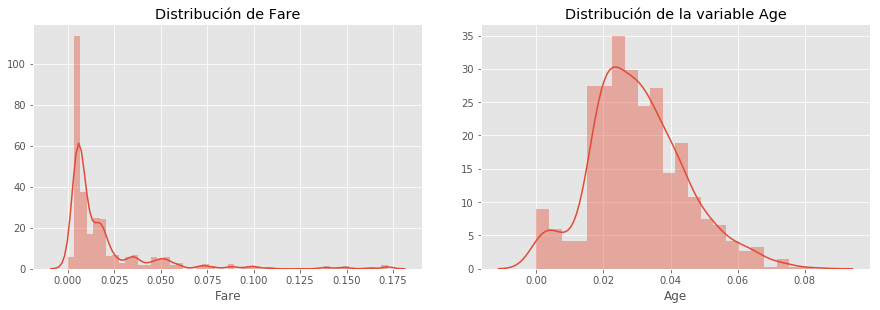

In [43]:
plt.style.use('ggplot') #Es el estilo que le ponemos a la data
fig = plt.figure(figsize = (15,4.5)) #Podemos elegir de qué tamaño poner nuestra data
fig.subplots_adjust(hspace=0.6, wspace=0.15) #Para que se pongan juntos los gráficos
ax = fig.add_subplot(1,2,1) #La posición de mi primer gráfico
ax.set_title('Distribución de Fare') #El título 
sns.distplot(train['Fare']) #El gráfico de distribución
ax_2 = fig.add_subplot(1,2,2) #agrego el otro gráfico
ax_2.set_title('Distribución de la variable Age')
sns.distplot(train['Age'])

## Estandarizando la data:

In [ ]:
#Como hemos editado la data 

## Guardamos nuestro trabajo hasta ahora

In [47]:
import dill

In [48]:
dill.dump_session('Titanic01.db')